Purpose
-------

The purpose of this notebook is to contain ideas and code snippets used in the application of Bayesian Statistics 


The Bayesian Approach
--------------------

"When the Facts Change, I Change My Mind. What Do You Do, Sir?" JMK

The Bayesian Approach is about updating what we believe about the world in the light of new evidence. 

* Make your assumptions explicit, this is modeled as $\theta$ 

* Quantify your prior beliefs about a system with a distribution

* Find or model data according to a likelihood function

* Compute posterior beliefs by coupling prior beliefs with data

* Infer something about the process 



In [10]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
#Let's simulate an experiment of coin flips
#We'll show that as the number of coin flips increase we gain information about the 
#underlying data generating process
number_of_trials = [0, 2, 10, 20, 50, 500]

In [12]:
#Coin flips represent a bernoulli process, bernoulli is a special case of the binomial case
#bernoulli process is a case of a memoryless process
#each toss, is independent of the last toss
#even if a coin is unfair, each throw's outcome is independent of the last
data = stats.bernoulli.rvs(0.5, size=number_of_trials[-1])

In [13]:
x = np.linspace(0, 1, 100)

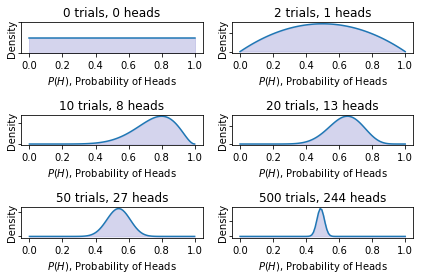

In [14]:
for i, N in enumerate(number_of_trials):
    heads = data[:N].sum()
    ax = plt.subplot(len(number_of_trials) / 2, 2, i + 1)
    ax.set_title("%s trials, %s heads" % (N, heads))
    plt.xlabel("$P(H)$, Probability of Heads")
    plt.ylabel("Density")
    
    if i == 0:
        plt.ylim([0.0, 2.0]) 
    plt.setp(ax.get_yticklabels(), visible=False)
    y = stats.beta.pdf(x, 1 + heads, 1 + N - heads)
    ax.plot(x, y, label="observe %d tosses,\n %d heads" % (N, heads))
    plt.fill_between(x, 0, y, color="#aaaadd", alpha=0.5)
        
plt.tight_layout()
plt.show()